In [1]:
!pip install pyreadr

   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.3 MB ? eta -:--:--
   ------------- -------------------------- 0.8/2.3 MB 2.0 MB/s eta 0:00:01
   ---------------------- ----------------- 1.3/2.3 MB 2.1 MB/s eta 0:00:01
   -------------------------- ------------- 1.6/2.3 MB 2.2 MB/s eta 0:00:01
   ------------------------------- -------- 1.8/2.3 MB 2.1 MB/s eta 0:00:01
   ------------------------------- -------- 1.8/2.3 MB 2.1 MB/s eta 0:00:01
   ----------------------------------- ---- 2.1/2.3 MB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 2.3/2.3 MB 1.5 MB/s  0:00:01


In [2]:
import pyreadr
import os

# path to the dataset
base_path = r"C:\Users\mahsa\Downloads\cortical neuron project\EEGMoralization\data"

# list files
print(os.listdir(base_path))

['.ipynb_checkpoints', 'cortical.ipynb', 'data_beh.RDS', 'data_issues.RDS', 'eeg_issue_epn.RDS', 'eeg_issue_lpp.RDS', 'eeg_issue_mfn.RDS', 'eeg_photo_epn.RDS', 'eeg_photo_lpp.RDS', 'eeg_photo_mfn.RDS', 'eeg_social_epn.RDS', 'eeg_social_lpp.RDS', 'eeg_social_mfn.RDS']


In [4]:
import pandas as pd
from pathlib import Path

base = Path(r"C:\Users\mahsa\Downloads\cortical neuron project\EEGMoralization\data")

print(list(base.glob("*.csv")))

[WindowsPath('C:/Users/mahsa/Downloads/cortical neuron project/EEGMoralization/data/data_beh.csv'), WindowsPath('C:/Users/mahsa/Downloads/cortical neuron project/EEGMoralization/data/data_issues.csv'), WindowsPath('C:/Users/mahsa/Downloads/cortical neuron project/EEGMoralization/data/eeg_issue_epn.csv'), WindowsPath('C:/Users/mahsa/Downloads/cortical neuron project/EEGMoralization/data/eeg_issue_lpp.csv'), WindowsPath('C:/Users/mahsa/Downloads/cortical neuron project/EEGMoralization/data/eeg_issue_mfn.csv'), WindowsPath('C:/Users/mahsa/Downloads/cortical neuron project/EEGMoralization/data/eeg_photo_epn.csv'), WindowsPath('C:/Users/mahsa/Downloads/cortical neuron project/EEGMoralization/data/eeg_photo_lpp.csv'), WindowsPath('C:/Users/mahsa/Downloads/cortical neuron project/EEGMoralization/data/eeg_photo_mfn.csv'), WindowsPath('C:/Users/mahsa/Downloads/cortical neuron project/EEGMoralization/data/eeg_social_epn.csv'), WindowsPath('C:/Users/mahsa/Downloads/cortical neuron project/EEGMora

In [5]:
import pandas as pd
from pathlib import Path

base = Path(r"C:\Users\mahsa\Downloads\cortical neuron project\EEGMoralization\data")

def peek(name, n=5):
    df = pd.read_csv(base / name)
    print("\n" + "="*80)
    print(name)
    print("shape:", df.shape)
    print("columns (first 30):", list(df.columns)[:30])
    print("dtypes (first 15):")
    print(df.dtypes.head(15))
    print("\nhead:")
    print(df.head(n))
    return df

beh = peek("data_beh.csv")
issues = peek("data_issues.csv")
epn_issue = peek("eeg_issue_epn.csv")


data_beh.csv
shape: (14040, 33)
columns (first 30): ['SubjectID', 'meta_d_raw', 'meta_d', 'Run', 'IssueText', 'IssueNum', 'Issue', 'ProtestView', 'Photo', 'Resp', 'RT', 'MC', 'MC.z', 'Moral', 'Moral.f', 'PriorSupport_scale', 'Response_scale', 'CurrentSupport', 'SocialSupport.f', 'Conformity', 'MajoritySupport.f', 'Age_month', 'Edu', 'Income', 'Age.z', 'Edu.z', 'Income.z', 'Female', 'Polarized', 'Polarized.z']
dtypes (first 15):
SubjectID          str
meta_d_raw     float64
meta_d         float64
Run              int64
IssueText          str
IssueNum         int64
Issue              str
ProtestView        str
Photo              str
Resp               str
RT               int64
MC             float64
MC.z           float64
Moral            int64
Moral.f            str
dtype: object

head:
  SubjectID  meta_d_raw    meta_d  Run  \
0    MVP503     0.31921 -0.279422    1   
1    MVP503     0.31921 -0.279422    1   
2    MVP503     0.31921 -0.279422    1   
3    MVP503     0.31921 -0.279422

In [6]:
# build a simple neural state representation
import numpy as np

# remove outliers first
epn = epn_issue[epn_issue["outlier"] == 0].copy()

# pivot to subject × channel × moral condition
state = epn.pivot_table(
    index=["SubjectID", "Moral"],
    columns="Channel",
    values="Amplitude",
    aggfunc="mean"
)

print(state.shape)
state.head()

(140, 64)


Channel                  AF3       AF4       AF7       AF8       AFz  \
SubjectID Moral                                                        
MVP503    Moral    -2.510029 -1.625987 -0.963772 -1.729707 -2.280560   
          Nonmoral -0.349800 -0.126795 -0.112393 -1.165762 -0.261279   
MVP504    Moral     0.201243  0.869114 -0.107139  1.111255  0.211706   
          Nonmoral  0.011037 -0.608293  1.218418 -0.848848 -0.965787   
MVP505    Moral     0.463545 -1.743558  3.155248 -7.552486 -0.367001   

Channel                   C1        C2        C3        C4        C5  ...  \
SubjectID Moral                                                       ...   
MVP503    Moral    -1.146184 -0.116917 -0.563469  0.762857 -0.833955  ...   
          Nonmoral  0.085115  0.179366 -0.137706  0.130286 -0.162878  ...   
MVP504    Moral     0.077982 -0.056213 -0.314639 -0.176169 -0.727238  ...   
          Nonmoral -0.202068 -0.592651 -0.118719 -0.932490 -0.154169  ...   
MVP505    Moral    -0.049287 -0.938039  0.371642 -0.915306  0.217470  ...   

Channel                  PO7       PO8       POz        Pz        T7  \
SubjectID Moral                                                        
MVP503    Moral     0.805813  2.466144  2.179234  1.405318 -0.827666   
          Nonmoral  0.761141  0.990932  2.330637  2.037509 -1.791543   
MVP504    Moral     0.176594  0.835272  0.577926  0.229245 -1.232704   
          Nonmoral  1.620480  0.720456  0.721580  0.270473  0.403325   
MVP505    Moral     2.257554  1.456567  1.331583  0.712809  0.776151   

Channel                   T8      TP10       TP7       TP8       TP9  
SubjectID Moral                                                       
MVP503    Moral     1.075539  1.605430  0.245007  2.225425 -1.261017  
          Nonmoral -0.606321 -0.553796 -0.817244 -1.117992 -1.640836  
MVP504    Moral    -0.758933 -1.265593 -1.038768  0.131326 -1.923132  
          Nonmoral -0.345005 -0.127899  0.659863  0.051046  1.407637  
MVP505    Moral    -1.667685 -0.198263  0.685241 -1.065812  1.370458  

[5 rows x 64 columns]

In [7]:
# check missing values and scaling
print("Any NaNs?", state.isna().any().any())
print("NaNs per channel:")
print(state.isna().sum().sort_values(ascending=False).head(10))

print("\nBasic stats:")
display(state.describe().T.head(10))

Any NaNs? False
NaNs per channel:
Channel
AF3    0
AF4    0
AF7    0
AF8    0
AFz    0
C1     0
C2     0
C3     0
C4     0
C5     0
dtype: int64

Basic stats:


,count,mean,std,min,25%,50%,75%,max
Channel,,,,,,,,
AF3,140.0,-0.369278,1.770511,-11.904855,-1.116186,-0.182839,0.441350,5.694776
AF4,140.0,-0.783569,1.762829,-13.819798,-1.496616,-0.563675,0.124571,4.173031
AF7,140.0,-0.154835,2.347923,-12.201323,-1.238277,-0.109766,1.069355,10.903353
AF8,140.0,-1.585177,2.697407,-17.538975,-2.552531,-1.203597,0.083603,3.461512
AFz,140.0,-0.673260,2.230031,-20.261679,-1.294344,-0.466351,0.408425,4.083154
C1,140.0,0.095064,0.847721,-1.935949,-0.335995,0.050779,0.474456,5.254213
C2,140.0,-0.093845,0.857631,-2.413584,-0.529397,-0.105234,0.266865,5.201037
C3,140.0,0.099208,0.828969,-2.013055,-0.366952,0.057051,0.457763,5.478285
C4,140.0,-0.256672,0.822746,-1.958189,-0.901520,-0.268246,0.324279,3.310982


In [9]:
!pip install scikit-learn

  Using cached scikit_learn-1.8.0-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached joblib-1.5.3-py3-none-any.whl.metadata (5.5 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.8.0-cp311-cp311-win_amd64.whl (8.1 MB)
Using cached joblib-1.5.3-py3-none-any.whl (309 kB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)

   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-le

In [10]:
from sklearn.preprocessing import StandardScaler

# normalize across all states
scaler = StandardScaler()
state_scaled = scaler.fit_transform(state)

# convert back to dataframe
state_scaled = pd.DataFrame(
    state_scaled,
    index=state.index,
    columns=state.columns
)

print(state_scaled.shape)
state_scaled.head()

(140, 64)


Channel                  AF3       AF4       AF7       AF8       AFz  \
SubjectID Moral                                                        
MVP503    Moral    -1.213456 -0.479594 -0.345770 -0.053774 -0.723340   
          Nonmoral  0.011041  0.373906  0.018141  0.156046  0.185405   
MVP504    Moral     0.323392  0.940884  0.020387  1.003228  0.398265   
          Nonmoral  0.215577  0.099786  0.586980  0.273957 -0.131647   
MVP505    Moral     0.472075 -0.546528  1.414854 -2.220183  0.137827   

Channel                   C1        C2        C3        C4        C5  ...  \
SubjectID Moral                                                       ...   
MVP503    Moral    -1.469476 -0.026999 -0.802269  1.243628 -0.680829  ...   
          Nonmoral -0.011778  0.319708 -0.286820  0.472014 -0.056242  ...   
MVP504    Moral    -0.020223  0.044036 -0.501023  0.098198 -0.581505  ...   
          Nonmoral -0.351766 -0.583698 -0.263833 -0.824366 -0.048136  ...   
MVP505    Moral    -0.170893 -0.987867  0.329822 -0.803405  0.297757  ...   

Channel                  PO7       PO8       POz        Pz        T7  \
SubjectID Moral                                                        
MVP503    Moral    -0.337926  0.380310  0.657403  0.626277 -0.576910   
          Nonmoral -0.359769 -0.365668  0.760071  1.201956 -1.486904   
MVP504    Moral    -0.645582 -0.444382 -0.428463 -0.444666 -0.959305   
          Nonmoral  0.060404 -0.502441 -0.331049 -0.407123  0.585267   
MVP505    Moral     0.371900 -0.130208  0.082601 -0.004328  0.937252   

Channel                   T8      TP10       TP7       TP8       TP9  
SubjectID Moral                                                       
MVP503    Moral     1.419033  1.074592  0.070701  1.936136 -0.881417  
          Nonmoral  0.126636 -0.214951 -0.785934 -0.913753 -1.143027  
MVP504    Moral     0.009364 -0.640053 -0.964578  0.151151 -1.337465  
          Nonmoral  0.327440  0.039406  0.405255  0.082721  0.956687  
MVP505    Moral    -0.688951 -0.002618  0.425721 -0.869275  0.931079  

[5 rows x 64 columns]

In [11]:
# compute neural dispersion between moral and nonmoral states
from scipy.spatial.distance import euclidean

dispersion = []

subjects = state_scaled.index.get_level_values(0).unique()

for s in subjects:
    try:
        moral = state_scaled.loc[(s, "Moral")].values
        nonmoral = state_scaled.loc[(s, "Nonmoral")].values
        d = euclidean(moral, nonmoral)
        dispersion.append([s, d])
    except:
        pass

dispersion = pd.DataFrame(dispersion, columns=["SubjectID", "NeuralDispersion"])

print(dispersion.shape)
dispersion.head()

(70, 2)


,SubjectID,NeuralDispersion
0,MVP503,7.039598
1,MVP504,5.409144
2,MVP505,4.872245
3,MVP506,8.388126
4,MVP509,6.183840


In [12]:
# subject-level behavioral summary
beh_subj = (
    beh.groupby("SubjectID")
    .agg(
        Conformity_mean=("Conformity", "mean"),
        Polarization_mean=("Polarized", "mean"),
        Moral_mean=("Moral", "mean"),
        RT_mean=("RT", "mean")
    )
    .reset_index()
)

print(beh_subj.shape)
beh_subj.head()

(78, 5)


,SubjectID,Conformity_mean,Polarization_mean,Moral_mean,RT_mean
0,MVP503,0.225000,0.488889,0.333333,1276.822222
1,MVP504,0.133333,0.766667,0.466667,1951.944444
2,MVP505,0.053371,0.733333,0.733333,1258.261111
3,MVP506,0.197222,0.500000,0.500000,1270.266667
4,MVP509,-0.047486,0.611111,0.666667,1249.994444


In [13]:
# merge neural and behavioral data
data = dispersion.merge(beh_subj, on="SubjectID", how="inner")

print(data.shape)
data.head()

(69, 6)


,SubjectID,NeuralDispersion,Conformity_mean,Polarization_mean,Moral_mean,RT_mean
0,MVP503,7.039598,0.225000,0.488889,0.333333,1276.822222
1,MVP504,5.409144,0.133333,0.766667,0.466667,1951.944444
2,MVP505,4.872245,0.053371,0.733333,0.733333,1258.261111
3,MVP506,8.388126,0.197222,0.500000,0.500000,1270.266667
4,MVP509,6.183840,-0.047486,0.611111,0.666667,1249.994444


In [14]:
# correlations between neural dispersion and behavior
import scipy.stats as stats

variables = ["Conformity_mean", "Polarization_mean", "Moral_mean", "RT_mean"]

for v in variables:
    r, p = stats.pearsonr(data["NeuralDispersion"], data[v])
    print(f"{v}: r = {r:.3f}, p = {p:.4f}")

Conformity_mean: r = -0.124, p = 0.3104
Polarization_mean: r = 0.096, p = 0.4339
Moral_mean: r = 0.241, p = 0.0463
RT_mean: r = -0.038, p = 0.7579


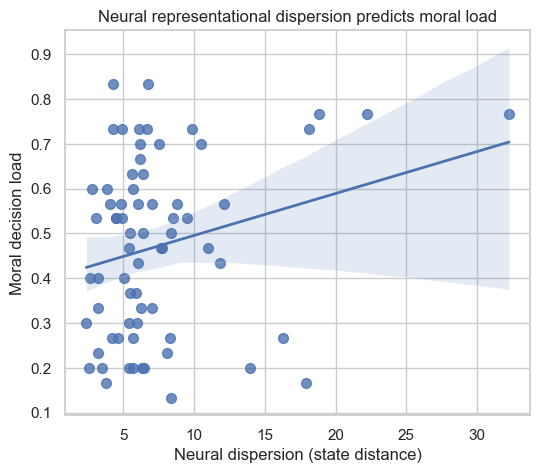

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(6,5))
sns.regplot(
    data=data,
    x="NeuralDispersion",
    y="Moral_mean",
    scatter_kws={"s":50},
    line_kws={"linewidth":2}
)
plt.title("Neural representational dispersion predicts moral load")
plt.xlabel("Neural dispersion (state distance)")
plt.ylabel("Moral decision load")
plt.show()

In [16]:
# robust correlation using Spearman
from scipy.stats import spearmanr

for v in ["Moral_mean", "Conformity_mean", "Polarization_mean"]:
    r, p = spearmanr(data["NeuralDispersion"], data[v])
    print(f"{v} (Spearman): r = {r:.3f}, p = {p:.4f}")

Moral_mean (Spearman): r = 0.191, p = 0.1167
Conformity_mean (Spearman): r = -0.035, p = 0.7723
Polarization_mean (Spearman): r = 0.046, p = 0.7088


In [17]:
# examine nonlinear threshold effects
high_disp = data["NeuralDispersion"] > data["NeuralDispersion"].quantile(0.75)

print(data.groupby(high_disp)["Moral_mean"].mean())

NeuralDispersion
False    0.455769
True     0.519608
Name: Moral_mean, dtype: float64


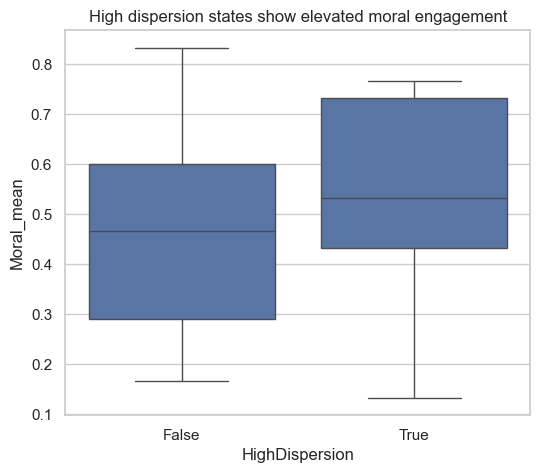

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

data["HighDispersion"] = high_disp

plt.figure(figsize=(6,5))
sns.boxplot(data=data, x="HighDispersion", y="Moral_mean")
plt.title("High dispersion states show elevated moral engagement")
plt.show()

In [19]:
from scipy.stats import ttest_ind

low = data.loc[data["HighDispersion"] == False, "Moral_mean"]
high = data.loc[data["HighDispersion"] == True, "Moral_mean"]

t, p = ttest_ind(high, low, equal_var=False)

print("Group difference t =", t)
print("p =", p)

Group difference t = 1.080668996352514
p = 0.2904342758670695


In [20]:
# bring in covariates from EEG file
covars = epn[["SubjectID", "Female", "Age.z", "Edu.z", "Income.z"]].drop_duplicates()

data2 = data.merge(covars, on="SubjectID")

import statsmodels.api as sm

X = data2[["NeuralDispersion", "Female", "Age.z", "Edu.z", "Income.z"]]
X = sm.add_constant(X)

y = data2["Moral_mean"]

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Moral_mean   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     1.428
Date:                Thu, 26 Feb 2026   Prob (F-statistic):              0.227
Time:                        11:19:04   Log-Likelihood:                 18.432
No. Observations:                  69   AIC:                            -24.86
Df Residuals:                      63   BIC:                            -11.46
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3795      0.050  

In [21]:
# leave-one-out analysis
loo_results = []

for i in range(len(data)):
    temp = data.drop(index=data.index[i])
    r, p = stats.pearsonr(temp["NeuralDispersion"], temp["Moral_mean"])
    loo_results.append(r)

loo_results = np.array(loo_results)

print("Original r:", stats.pearsonr(data["NeuralDispersion"], data["Moral_mean"])[0])
print("LOO range:", loo_results.min(), "to", loo_results.max())
print("LOO mean:", loo_results.mean())

Original r: 0.24077188459875273
LOO range: 0.16651747342632603 to 0.3036452528478955
LOO mean: 0.2405870533985425


In [22]:
import statsmodels.api as sm

X = sm.add_constant(data["NeuralDispersion"])
y = data["Moral_mean"]

robust_model = sm.RLM(y, X, M=sm.robust.norms.HuberT()).fit()
print(robust_model.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:             Moral_mean   No. Observations:                   69
Model:                            RLM   Df Residuals:                       67
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 26 Feb 2026                                         
Time:                        12:05:13                                         
No. Iterations:                    12                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3946      0.042  

In [23]:
# permutation test
n_perm = 5000
obs_r, _ = stats.pearsonr(data["NeuralDispersion"], data["Moral_mean"])

perm_rs = []

for _ in range(n_perm):
    shuffled = np.random.permutation(data["Moral_mean"])
    r, _ = stats.pearsonr(data["NeuralDispersion"], shuffled)
    perm_rs.append(r)

perm_rs = np.array(perm_rs)

p_perm = np.mean(np.abs(perm_rs) >= np.abs(obs_r))
print("Permutation p:", p_perm)

Permutation p: 0.051


In [24]:
import numpy as np
import pandas as pd
from scipy import stats

# data must contain: 'NeuralDispersion' and 'Moral_mean'
df = data[['NeuralDispersion', 'Moral_mean']].dropna().copy()

# median split (illustrative only)
thr = df['NeuralDispersion'].median()
df['HighDispersion'] = df['NeuralDispersion'] > thr

g0 = df.loc[~df['HighDispersion'], 'Moral_mean'].to_numpy()
g1 = df.loc[df['HighDispersion'], 'Moral_mean'].to_numpy()

# Welch t-test (does not assume equal variances)
t_welch, p_welch = stats.ttest_ind(g1, g0, equal_var=False)

# Mann–Whitney U (rank-based)
u, p_mwu = stats.mannwhitneyu(g1, g0, alternative='two-sided')

# Cohen's d (Hedges g optional, but d is fine for PoC)
def cohens_d(a, b):
    a = np.asarray(a); b = np.asarray(b)
    na, nb = len(a), len(b)
    sa2 = a.var(ddof=1); sb2 = b.var(ddof=1)
    sp = np.sqrt(((na-1)*sa2 + (nb-1)*sb2) / (na+nb-2))
    return (a.mean() - b.mean()) / sp

d = cohens_d(g1, g0)

# Cliff's delta (robust effect size for ordinal/non-normal)
def cliffs_delta(a, b):
    a = np.asarray(a); b = np.asarray(b)
    # pairwise comparisons
    gt = 0
    lt = 0
    for x in a:
        gt += np.sum(x > b)
        lt += np.sum(x < b)
    return (gt - lt) / (len(a) * len(b))

delta = cliffs_delta(g1, g0)

print("Median threshold (NeuralDispersion):", float(thr))
print("n Low/High:", len(g0), len(g1))
print("Means Low/High:", float(g0.mean()), float(g1.mean()))
print("Welch t-test: t =", float(t_welch), "p =", float(p_welch))
print("Mann–Whitney: U =", float(u), "p =", float(p_mwu))
print("Cohen's d (High - Low):", float(d))
print("Cliff's delta (High vs Low):", float(delta))

Median threshold (NeuralDispersion): 6.031487098842851
n Low/High: 35 34
Means Low/High: 0.4323809523809524 0.5117647058823528
Welch t-test: t = 1.6927806021683987 p = 0.09535237407017517
Mann–Whitney: U = 726.5 p = 0.11512819458634878
Cohen's d (High - Low): 0.4087189487321178
Cliff's delta (High vs Low): 0.22100840336134453


In [25]:
# --- Quantile binning (terciles) ---
df = data[['NeuralDispersion', 'Moral_mean']].dropna().copy()

df['Dispersion_bin'] = pd.qcut(df['NeuralDispersion'], q=3, labels=['Low', 'Medium', 'High'])

# group summary
summary = df.groupby('Dispersion_bin')['Moral_mean'].agg(['mean','std','count'])
print(summary)

# --- ANOVA (exploratory) ---
from scipy import stats

low = df[df['Dispersion_bin']=='Low']['Moral_mean']
med = df[df['Dispersion_bin']=='Medium']['Moral_mean']
high = df[df['Dispersion_bin']=='High']['Moral_mean']

f_stat, p_anova = stats.f_oneway(low, med, high)
print("ANOVA: F =", f_stat, "p =", p_anova)

# --- Trend test (linear contrast) ---
# encode bins as ordered 0,1,2 to test monotonic increase
df['trend_code'] = df['Dispersion_bin'].map({'Low':0, 'Medium':1, 'High':2})

trend_r, trend_p = stats.pearsonr(df['trend_code'], df['Moral_mean'])
print("Linear trend: r =", trend_r, "p =", trend_p)

                    mean       std  count
Dispersion_bin                           
Low             0.440580  0.194354     23
Medium          0.472464  0.193232     23
High            0.501449  0.206823     23
ANOVA: F = 0.5425623067466379 p = 0.5838271070838632
Linear trend: r = 0.12713426640276057 p = 0.29787789395876435


In [26]:
# effect sizes for Low vs High terciles
low = df[df['Dispersion_bin']=='Low']['Moral_mean'].values
high = df[df['Dispersion_bin']=='High']['Moral_mean'].values

def cohens_d(a, b):
    a = np.asarray(a); b = np.asarray(b)
    na, nb = len(a), len(b)
    sa2 = a.var(ddof=1); sb2 = b.var(ddof=1)
    sp = np.sqrt(((na-1)*sa2 + (nb-1)*sb2) / (na+nb-2))
    return (b.mean() - a.mean()) / sp

def cliffs_delta(a, b):
    gt = 0
    lt = 0
    for x in b:
        gt += np.sum(x > a)
        lt += np.sum(x < a)
    return (gt - lt) / (len(a) * len(b))

d_tercile = cohens_d(low, high)
delta_tercile = cliffs_delta(low, high)

print("Cohen’s d (High vs Low tercile):", d_tercile)
print("Cliff’s delta (High vs Low tercile):", delta_tercile)

Cohen’s d (High vs Low tercile): 0.3033089372635075
Cliff’s delta (High vs Low tercile): 0.15879017013232513


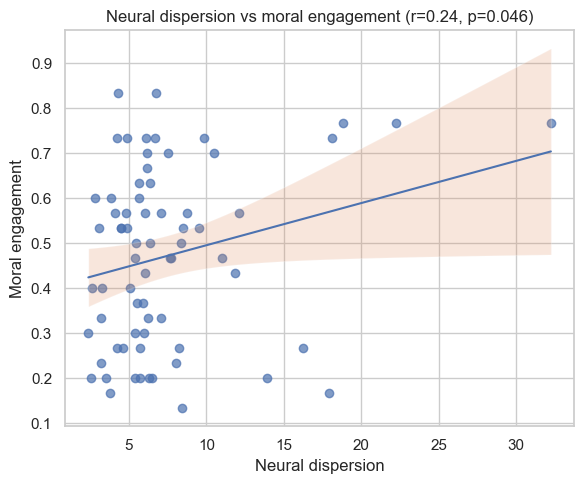

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# clean data
df = data[['NeuralDispersion', 'Moral_mean']].dropna().copy()

x = df['NeuralDispersion'].values
y = df['Moral_mean'].values

# regression
slope, intercept, r, p, se = stats.linregress(x, y)

# prediction line
x_line = np.linspace(x.min(), x.max(), 100)
y_line = intercept + slope * x_line

# confidence band
n = len(x)
residuals = y - (intercept + slope * x)
s_err = np.sqrt(np.sum(residuals**2) / (n - 2))
conf = 1.96 * s_err * np.sqrt(1/n + (x_line - x.mean())**2 / np.sum((x - x.mean())**2))

# plot
plt.figure(figsize=(6,5))
plt.scatter(x, y, alpha=0.7)
plt.plot(x_line, y_line)
plt.fill_between(x_line, y_line-conf, y_line+conf, alpha=0.2)

plt.xlabel("Neural dispersion")
plt.ylabel("Moral engagement")
plt.title(f"Neural dispersion vs moral engagement (r={r:.2f}, p={p:.03f})")

plt.tight_layout()
plt.show()

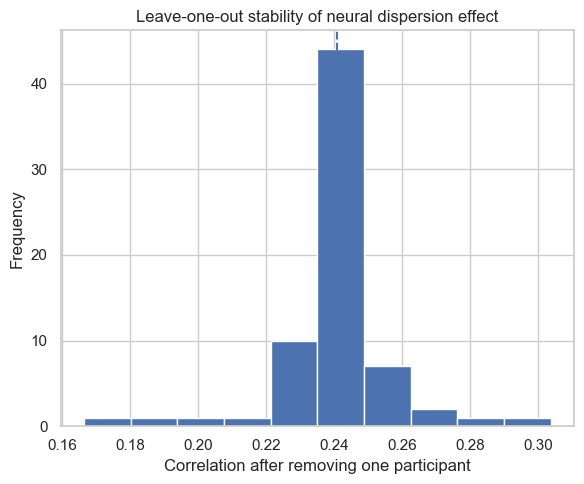

Original r: 0.24077188459875293
LOO min: 0.16651747342632603
LOO max: 0.3036452528478955


In [28]:
from scipy.stats import pearsonr

loo_r = []

for i in range(len(df)):
    temp = df.drop(df.index[i])
    r_i, _ = pearsonr(temp['NeuralDispersion'], temp['Moral_mean'])
    loo_r.append(r_i)

plt.figure(figsize=(6,5))
plt.hist(loo_r, bins=10)
plt.axvline(r, linestyle='--')

plt.xlabel("Correlation after removing one participant")
plt.ylabel("Frequency")
plt.title("Leave-one-out stability of neural dispersion effect")

plt.tight_layout()
plt.show()

print("Original r:", r)
print("LOO min:", np.min(loo_r))
print("LOO max:", np.max(loo_r))

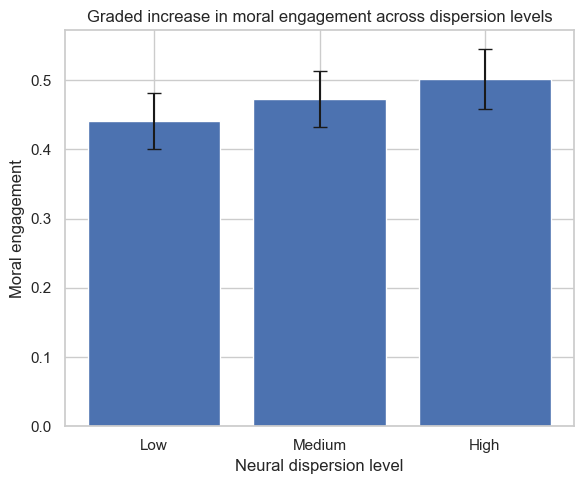

In [29]:
# create terciles again if needed
df['Dispersion_bin'] = pd.qcut(df['NeuralDispersion'], q=3, labels=['Low','Medium','High'])

means = df.groupby('Dispersion_bin')['Moral_mean'].mean()
errors = df.groupby('Dispersion_bin')['Moral_mean'].sem()

plt.figure(figsize=(6,5))
plt.bar(means.index, means.values, yerr=errors.values, capsize=5)

plt.xlabel("Neural dispersion level")
plt.ylabel("Moral engagement")
plt.title("Graded increase in moral engagement across dispersion levels")

plt.tight_layout()
plt.show()

In [30]:
from scipy.stats import spearmanr

pearson_r, pearson_p = pearsonr(df['NeuralDispersion'], df['Moral_mean'])
spearman_r, spearman_p = spearmanr(df['NeuralDispersion'], df['Moral_mean'])

table = pd.DataFrame({
    "Analysis": ["Pearson", "Spearman"],
    "Correlation": [pearson_r, spearman_r],
    "p_value": [pearson_p, spearman_p]
})

table

,Analysis,Correlation,p_value
0,Pearson,0.240772,0.046274
1,Spearman,0.190600,0.116708


In [31]:
table.to_csv("main_association_table.csv", index=False)